![fletcherReeves_Vanderplaats.png](fletcherReeves_Vanderplaats.png)

iter=  0 x =  -4.0 y =  4.0 f= 1476.0
iter=  1 x =  2.1828226884994524 y =  4.766187764892857 f= 0.03344582905151825
iter=  2 x =  2.04850883530547 y =  4.17881861312941 f= 0.005440098190545335
iter=  3 x =  2.0114433564379905 y =  4.048198343421491 f= 0.00018357326460231567
iter=  4 x =  2.011667746523627 y =  4.046927575736963 f= 0.00013628139899516016
iter=  5 x =  2.011613383154099 y =  4.046907014360868 f= 0.00013588579846260588
iter=  6 x =  2.011522161484302 y =  4.046019486955622 f= 0.00013316791885054652
iter=  7 x =  2.0025658945099516 y =  4.011726471172759 f= 2.7792182942339087e-05
iter=  8 x =  2.000745706178542 y =  4.00289566072868 f= 6.330257995813206e-07
iter=  9 x =  2.0007092732563088 y =  4.0028608762789375 f= 5.084882223211569e-07
iter=  10 x =  2.0007111418376167 y =  4.002858328435905 f= 5.074797596184687e-07
iter=  11 x =  2.000662733671515 y =  4.0027150300316645 f= 4.797369478250292e-07
iter=  12 x =  2.0000961677409377 y =  4.000336221558086 f= 3.273064577356

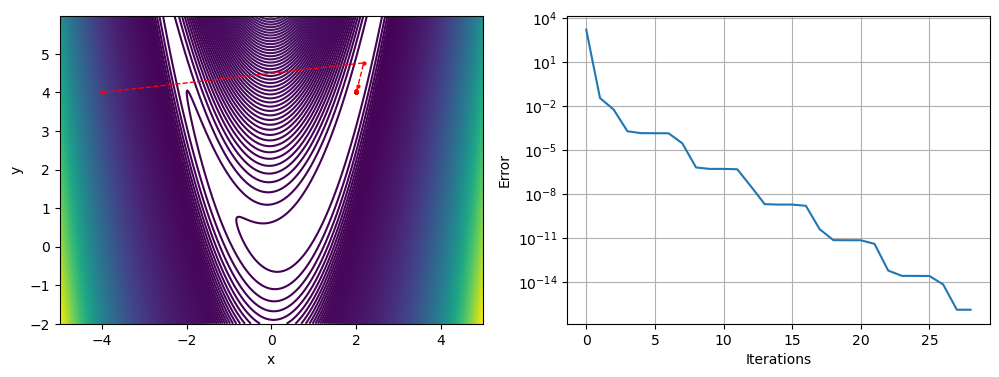

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def rosenbrock(X,funcParams, doGradient):
  """
  Compute the Rosenbrock function and optionally its gradient.
  
  The Rosenbrock function is defined as:
      f(x, y) = (a - x)^2 + b * (y - x^2)^2
  where 'a' and 'b' are parameters that control the shape of the function.

  Parameters:
      X (numpy.ndarray): A 2-element array representing the point [x, y] in 2D space
                      where the function and gradient are evaluated.
      funcParams (numpy.ndarray): A 2-element array containing the parameters [a, b]
                                for the Rosenbrock function.
      doGradient (bool): If True, the function also returns the gradient vector.
                          If False, only the function value is returned.

  Returns:
      f (float): The value of the Rosenbrock function at the given point [x, y].
      gradf (numpy.ndarray or None): The gradient vector [df/dx, df/dy] if doGradient is True.
                                      If doGradient is False, returns None for the gradient.
  """
  x = X[0]
  y = X[1]
  
  a = funcParams[0]
  b = funcParams[1]
  
  x2 = x*x
  
  t1 = a-x
  t2 = y-x2
  
  f = t1**2 + b*t2**2
  
  if doGradient:
    dfdx = - 2*t1 - 4*b*x*t2
    dfdy = 2*b*t2
  
    gradf = np.array([dfdx,dfdy])
  
    return f, gradf
  else:
    return f, None

def line_search(X, S, func, funcParams, maxIter, tol):
    """
    Perform a golden section line search to find the optimal alpha that minimizes
    the function F(X + alpha * S) given X and S
    
    Parameters:
        X (numpy.ndarray): Current point in the space.
        S (numpy.ndarray): Search direction.
        tol (float): Tolerance for stopping criterion.
        max_iter (int): Maximum number of iterations.

    Returns:
        alpha_star (float): The optimal step size.
    """
    # Golden ratio
    phi = (1 + np.sqrt(5)) / 2
    inv_phi = 1 / phi

    # Initial interval [a, b]
    a = 0
    b = 1
    # Evaluate points within the interval
    alpha1 = b - inv_phi * (b - a)
    alpha2 = a + inv_phi * (b - a)

    # Compute objective function values at the points
    f1 = func(X + alpha1 * S, funcParams, False)
    f2 = func(X + alpha2 * S, funcParams, False)

    # Iteratively narrow the search interval
    for _ in range(maxIter):
        if abs(b - a) < tol:
            break

        # Compare function values and update the interval
        if f1 < f2:
            b = alpha2
            alpha2 = alpha1
            f2 = f1
            alpha1 = b - inv_phi * (b - a)
            f1 = func(X + alpha1 * S, funcParams, False)
        else:
            a = alpha1
            alpha1 = alpha2
            f1 = f2
            alpha2 = a + inv_phi * (b - a)
            f2 = func(X + alpha2 * S, funcParams, False)

    # Optimal step size is the midpoint of the final interval
    alpha_star = (a + b) / 2
    return alpha_star


def fletcherReevesOpt(X0,func, funcParams, maxLineSearchIters, lineSearchTol, absTol, relTol):
  """
  Perform the Fletcher-Reeves Conjugate Gradient optimization algorithm.

  Parameters:
      X0 (numpy.ndarray): The initial guess point for the optimization, e.g. a 2D vector [x, y].
      func (callable): The objective function to be minimized. Should return 
                        the function value and its gradient at a given point.
      funcParams (numpy.ndarray): Parameters required by the objective function.
      maxLineSearchIters (int): The maximum number of iterations allowed for the line search.
      lineSearchTol (float): Tolerance for the line search stopping criterion.
      absTol (float): Absolute tolerance for convergence of the objective function.
      relTol (float): Relative tolerance for convergence of the objective function.

  Returns:
      X (numpy.ndarray): The optimized point in the parameter space where the 
                          objective function reaches a minimum.
      f (float): The value of the objective function at the optimized point.

  """
  # Step 1: Initialize
  X = X0
  iters = 0
  f, gradf = func(X, funcParams, True)
  a = np.dot(gradf, gradf)
  print("iter= ", iters, "x = ", X[0], "y = ", X[1], "f=", f)


  # for plotting
  XHistory = [X]
  fHistory = [f]
  
  while True:

    # If first time or if Fletcher-Reeves fails, then just select steepest descent
    S = -gradf
    
    # Step 2: Line search to find optimal alpha
    alpha_star = line_search(X, S, func, funcParams, maxLineSearchIters, lineSearchTol)

    # Step 3: Check if alpha_star equals zero
    if np.abs(alpha_star)<=1e-10:
      print("Alpha is zero, algorithm exits.")
      break
    
    # Step 4: Update X
    X = X + alpha_star * S
    
    # Step 5: compute function and gradient at new X
    f, gradf = func(X, funcParams, True)

    while True:
      
      # Compute Fletcher-Reeves conjugate direction update:
      b = np.dot(gradf,gradf)
      beta = b/a
      S = -gradf + beta*S
      a = b
      
      # if slope in the new S direction is greater than 0, break
      if np.dot(S,gradf)>=0:
        break
      
      # line search to find optimal alpha
      alpha_star = line_search(X, S, func, funcParams, maxLineSearchIters, lineSearchTol)
      
      # compute new point and evaluate function
      X_new = X + alpha_star * S
      f_new, gradf_new = func(X_new, funcParams, True)

      # check if convergence criteria are met
      if np.abs(f_new - f)/np.abs(f)<= relTol or np.abs(f_new - f)<=absTol:
        XHistory.append(X)
        fHistory.append(f)
        return X, f, XHistory, fHistory
      else:
        X = X_new
        f = f_new
        XHistory.append(X)
        fHistory.append(f)
        gradf = gradf_new
        iters = iters + 1
        print("iter= ", iters, "x = ", X[0], "y = ", X[1], "f=", f)
    iters = iters + 1
    
  return X, f, XHistory, fHistory


# Test Case
def testCGWithRosenbrock():
  X0 = np.array([-4.0,4.0])

  a = 2
  b = 10
  rosenbrockFuncParams = np.array([a,b])
  maxLineSearchIters = 100
  lineSearchTol = 1e-12
  relTol = 1e-12
  absTol = 1e-16

  _,_, XHistory, fHistory = fletcherReevesOpt(X0,rosenbrock, rosenbrockFuncParams, maxLineSearchIters, lineSearchTol, absTol, relTol)
  
  # Basic contour plot
  delta = 0.01
  x = np.arange(-5.0, 5.0, delta)
  y = np.arange(-2.0, 6.0, delta)
  X, Y = np.meshgrid(x, y)
  Z, _ = rosenbrock(np.array([X,Y]), rosenbrockFuncParams,False)
  
  fig1, ((ax11, ax12)) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
  ax11.grid(True)
  CS = ax11.contour(X, Y, Z, levels=1000)
  
  
  iters = len(XHistory)
  xPlot = np.empty((iters,))
  yPlot = np.empty((iters,))
  for i in range(iters):
    xPlot[i] = XHistory[i][0]
    yPlot[i] = XHistory[i][1]
    
  ax11.plot(xPlot,yPlot, marker='o', color='r', linestyle='--', markersize=2, linewidth=1)
  ax11.set_xlabel('x')
  ax11.set_ylabel('y')

  ax12.plot(list(range(iters)), fHistory)
  ax12.set_yscale('log')
  ax12.grid(True)
  ax12.set_xlabel('Iterations')
  ax12.set_ylabel('Error')
    
  


# Run test cases
testCGWithRosenbrock()
      

      
      

  
  
  